In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from autodiff import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import numpy as np
from IPython.display import Image
from IPython.display import HTML 
from fractals import *

# Newton Fractal

![Image of Newton Fractal](https://upload.wikimedia.org/wikipedia/commons/6/65/Mnfrac4.png)

Newton's method, also called the Newton-Raphson method, is one of the most used root-finding algorithm in scientific computing. Not only it converges very fast, it is also very easy to implement.

The Newton-Raphson iteration method successively outputs better approximations of the roots of a function through use of the function itself and its derivatives. The method intakes a function f(x), its derivative f'(x), and an approximation of the root a and continually calculates a′=a−f(a)/f′(a), where a' is a better approximation of the root than a.

Fractals, self-repeated patterns visible at every scale, can suprisingly be seen when one studies the Newton-Raphson algorithm. In this tutorial, we will first help you generate fractals using Newton's method with different equations in the complex plane.

### Visualizing Newton Fractal

For example, let us generate a Newton Fractal with the following equation:

$$z^3 - 1 = 0$$

We can visualize the Newton Fractal with the given equation by:

In [2]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
max_iters = 40
alpha = 1
x = Variable('x')
f = x**3 - 1

fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)

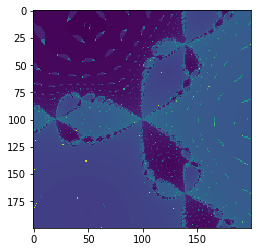

In [4]:
plt.imshow(fractal_image)

### Different Computation Methods for Calculating the Derivative

Running the Newton's method requires the computation of derivatives. There are two methods of computing derivatives: Automatic Differentiation(AD) and Finite Difference. We have implemented our Newton's method so that we can specifiy which method we want to use.

We can visualize the above Newton Fractal using Finite Difference by:

In [8]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
max_iters = 40
alpha = 1
x = Variable('x')
f = x**3 - 1

fractal_image_finite = create_fractal(f, size, area, "Finite", e, max_iters, alpha)

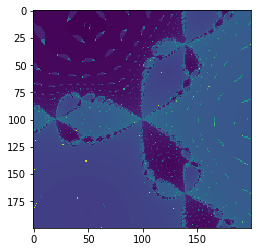

In [9]:
plt.imshow(fractal_image_finite)

### Comparing Automatic Differentiation and Finite Difference

The finite difference approach is nice because it is quick and easy. However, it can only get to serveral orders of magnitude above machine precision. On the other hand, the Automatic difference can be evaluated to machine precision. 

Because generating the Newtons Fractal requires many iterations of Newton's method, which again requires computation of derivatives, we would expect that the error caused during the Finite Difference method will accumulate and will be significant.

We can first compare the above two images:

In [13]:
diff_fractal = abs(fractal_image - fractal_image_finite)
np.any(diff_fractal)

False

In fact, we actually see that there is absolutely no difference in the generated fractal images. This is because within the given maximum iterations, each point in the complex coordinate will converge to the same root. 

We can try the same with smaller iterations.

In [19]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
alpha = 1
x = Variable('x')
f = x**3 - 1

differences = []
for max_iters in range(2,10):
    fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)
    fractal_image_finite = create_fractal(f, size, area, "Finite", e, max_iters, alpha)
    diff_fractal = abs(fractal_image - fractal_image_finite)
    difference = np.any(diff_fractal)
    differences.append(difference)

In [20]:
np.any(differences)

False

We again see that there are no difference in the generated fractal.

### Visualize Different Newton Fractals

#### (1) $z^6 - z^3 +2$

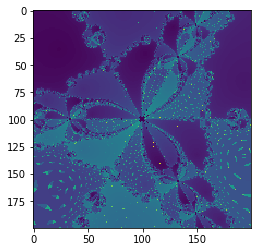

In [23]:
f = x**6 - x**3 + 1

fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)
plt.imshow(fractal_image)

#### (2) $z^3 - 2z +2$

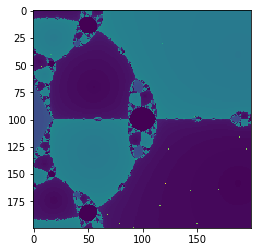

In [24]:
f = x**3 - 2*x + 2

fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)
plt.imshow(fractal_image)

#### (3) $z^5 - z$

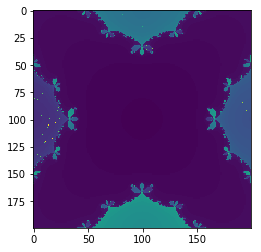

In [25]:
f = x**5 - x

fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)
plt.imshow(fractal_image)

## Newton Fractal Video

In this section, we will be creating animated newton fractals.

We will again work with the function $z^3 - 1$.

Here, rather than working with a set alpha (this is the step size of the Newton's method), we will work with different alphas and save the images.

Note that you might get a `UserWarning: MovieWriter ffmpeg unavailable` warning. In that case, please refer to [https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg] to download ffmpeg on your computer.

In [7]:
f = x**3 - 1

images = []
for alpha in np.linspace(0.5,1.5,2):
    fractal_image = create_fractal(f, size, area, "AD", e, max_iters, alpha)
    images.append(fractal_image)

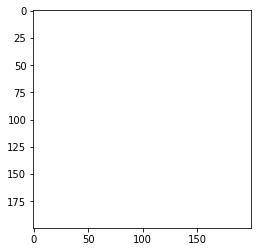

In [8]:


save_video(images, 'fractals_are_cool.mp4')

Enjoy your Newton Fractal video!

In [10]:
%%HTML
<video width="320" height="240" controls>
  <source src="fractals_are_cool.mp4" type="video/mp4">
</video>